In [2]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from localization.experiments.ica import get_mixing_matrix
from localization import datasets
from sklearn.decomposition import FastICA

def plot10(W):
    n = int(jnp.sqrt(W.shape[1]))
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            im = axs[i,j].imshow(W[5 * i + j,:].reshape(n, n), cmap='gray')
            cbar = fig.colorbar(im)
            axs[i,j].set_title(f"{5 * i + j}")
    fig.tight_layout()
    return fig, axs

## Natural scenes dataset

In [3]:
ndim = 20
scenes_dataset = datasets.ScenesDataset(key=jax.random.PRNGKey(0), side_length=ndim,)
X_scenes = scenes_dataset[:100000][0]

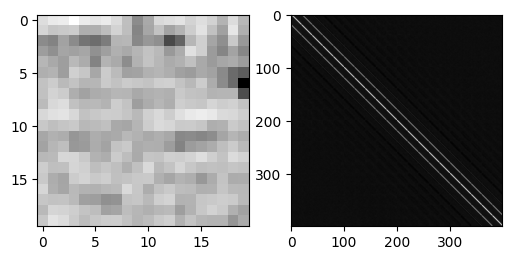

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
_ = ax1.imshow(X_scenes[0].reshape(ndim, ndim), cmap='gray')
_ = ax2.imshow(np.cov(X_scenes.T), cmap='gray')

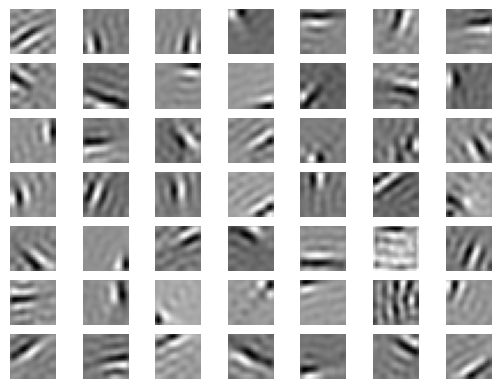

In [5]:
# Scenes dataset
ica = FastICA(n_components=49, random_state=0) # , whiten='unit-variance')
ica.fit(X_scenes)
filters = ica.components_

plt.figure()
for i, f in enumerate(filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(ndim, ndim), cmap="gray")
    plt.axis("off")
plt.show()

## NLGP dataset

In [39]:
ndim = 8 # 8
ncomp = 64 # 49
xi = (5., 3., 0.1)

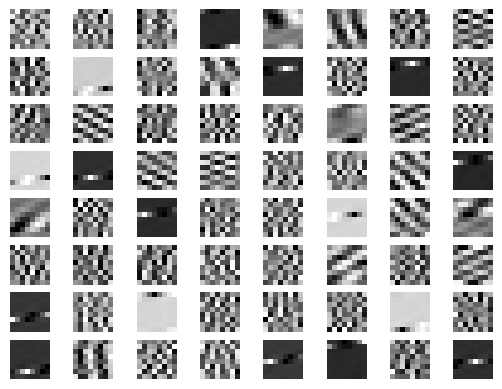

In [41]:
# high gain
nlgp_dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), xi=xi, gain=3, num_dimensions=ndim**2, dim=1)
X_nlgp = nlgp_dataset[:1000000][0]
ica = FastICA(n_components=ncomp, random_state=0) # , whiten='unit-variance')
ica.fit(X_nlgp)
filters = ica.components_

plt.figure()
for i, f in enumerate(filters):
    plt.subplot(int(np.sqrt(ncomp)), int(np.sqrt(ncomp)), i + 1)
    plt.imshow(f.reshape(ndim, ndim), cmap="gray")
    plt.axis("off")
plt.show()

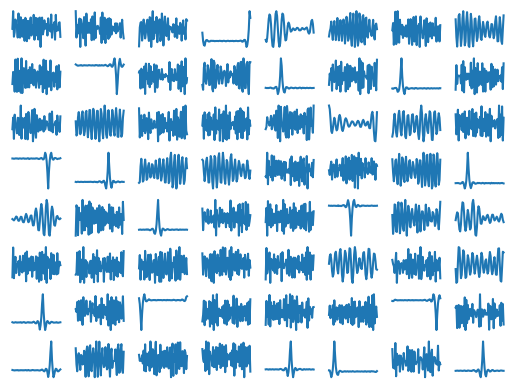

In [42]:
plt.figure()
for i, f in enumerate(filters):
    plt.subplot(int(np.sqrt(ncomp)), int(np.sqrt(ncomp)), i + 1)
    plt.plot(f)
    plt.axis("off")
plt.show()

In [48]:
x = X_nlgp[:,0]
kurt = jnp.mean((x - jnp.mean(x)) ** 4) / jnp.mean((x - jnp.mean(x)) ** 2) ** 2
print(kurt)

1.1658272


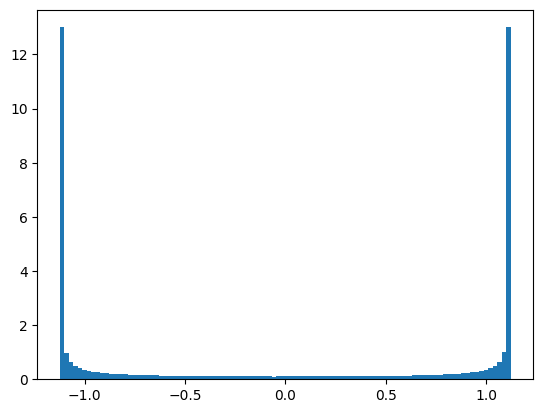

In [49]:
_ = plt.hist(x, bins=100, density=True)

/Users/leonlufkin/opt/anaconda3/envs/jax-pr/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


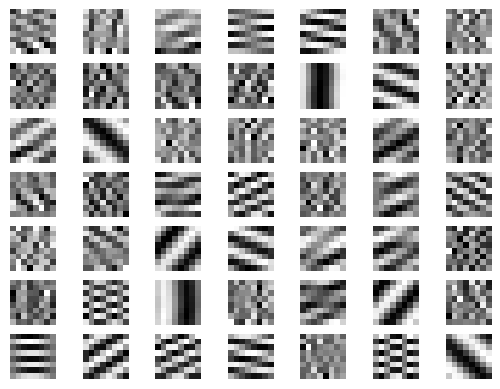

In [31]:
# low gain
nlgp_dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), xi=xi, gain=0.01, num_dimensions=ndim**2, dim=1)
X_nlgp = nlgp_dataset[:1000000][0]
ica = FastICA(n_components=ncomp, random_state=0) # , whiten='unit-variance')
ica.fit(X_nlgp)
filters = ica.components_

plt.figure()
for i, f in enumerate(filters):
    plt.subplot(int(np.sqrt(ncomp)), int(np.sqrt(ncomp)), i + 1)
    plt.imshow(f.reshape(ndim, ndim), cmap="gray")
    plt.axis("off")
plt.show()

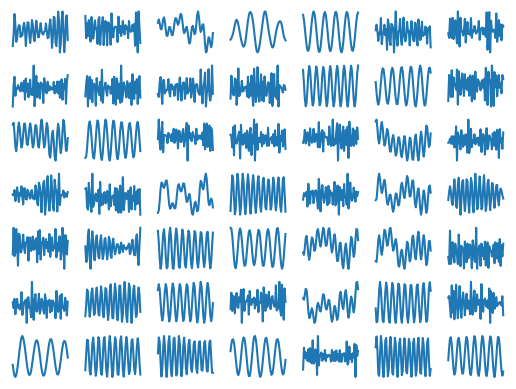

In [33]:
plt.figure()
for i, f in enumerate(filters):
    plt.subplot(int(np.sqrt(ncomp)), int(np.sqrt(ncomp)), i + 1)
    plt.plot(f)
    plt.axis("off")
plt.show()